
# 🍲 Recipe Recommender System – Project Proposal  

## 1. Title:  
**Recipe Recommender System – A recipe recommendation system based on available ingredients**

---  

## 2. 👥 Names + ID + Email:  
- **Gil Avraham** – 318180213 | ✉️ gil12av@gmail.com  
- **Gil Cohen** – 314800558 | ✉️ gilc1998@gmail.com  

---

## 3. General Problem Description:  
In today's world, the availability of recipes is vast, but choosing a suitable recipe based on available ingredients can be challenging.  
Our goal is to build a **recipe recommendation system** that suggests recipes based on the ingredients users have at home.  
Recipes will be ranked from **easy to hard** based on the number of required ingredients and preparation time.  


---  


## 4.	Why we choose this project:
So we chose this project for several reasons:
- **Personal interest:**
 The field of food and cooking is relevant to almost everyone, and such a project could improve the cooking experience of many users.
- **Practical potential:**
such a system could easily integrate into existing applications, such as recipe management or grocery ordering applications.
- The challenge of analyzing the data from the dataset to providing a solution to the customer really interested us.
- Social motivation – the system could encourage healthy cooking by recommending recipes with a small number of healthy ingredients, which could be beneficial for people with limited access to groceries.


---  


## 5.	The design implementation:
The Dataset is from Kaggle : https://www.kaggle.com/datasets/arifmia/comprehensive-recipe-dataset (You can download from this link).

Overview: The dataset contains 5000 rows and 20 columns, representing detailed information about various recipes. Each row corresponds to a recipe, along with user feedback and other metadata. Below is a comprehensive breakdown of the columns and their potential applications.
The first step we will take is to fix missing values in the dataset or remove them if they are not useful to us.
Next, we will need to search the dataset for the ingredient list and the recipe rating to provide a recommendation to the user.


---  


## 6.	General description of the experiment:
The purpose of the experiment:
To test which algorithm provides the most accurate and tailored recommendations based on ingredient availability and user reviews.

We would like to test the accuracy of matching a recipe to a user more efficiently than a model based on a ranking from a dataset.


## **Import the dataSet from kaggle.**

In [ ]:
import pandas as pd
from google.colab import files

# ייבוא של הקובץ
df = pd.read_csv('recipe_data.csv')


# בדיקת 5 השורות הראשונות
print(df.head())

# בדיקת ערכים ייחודיים בעמודת 'Difficulty_Level'
print(df['Difficulty_Level'].unique())

# בדיקת כמה מתכונים יש בכל רמת קושי
print(df['Difficulty_Level'].value_counts())

# בדיקה אם 'Ingredients_List' מכילה ערכים
print(df['Ingredients_List'].head())


  Recipe_ID          Recipe_Name Cuisine_Type  \
0      R001           Beef Tacos      Mexican   
1      R002  Spaghetti Bolognese      Italian   
2      R003        Chicken Curry       Indian   
3      R004        Chicken Curry       Indian   
4      R005   Vegetable Stir Fry      Chinese   

                                    Ingredients_List  \
0         Beef, Taco Shells, Lettuce, Cheese, Tomato   
1  Spaghetti, Ground Beef, Tomato Sauce, Onion, G...   
2  Chicken, Curry Powder, Coconut Milk, Onion, Ga...   
3  Chicken, Curry Powder, Coconut Milk, Onion, Ga...   
4   Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic   

                                   Preparation_Steps  Cooking_Time_Minutes  \
0       Cook beef; Prepare toppings; Assemble tacos.                    55   
1         Boil pasta; Cook beef; Add sauce; Combine.                    39   
2  Cook chicken; Add spices; Pour coconut milk; S...                    36   
3  Cook chicken; Add spices; Pour coconut milk; S...    

## **part 1- Work with dataset:**

With those function we can see the missing value in the dataset. we need to fix the missing value and then we can go to the next step.

In [ ]:
# להציג 20 מתכונים מתוך הדטה
df.head(20)

,Recipe_ID,Recipe_Name,Cuisine_Type,Ingredients_List,Preparation_Steps,Cooking_Time_Minutes,Difficulty_Level,User_ID,User_Preferences,User_Rating,User_Feedback,Date_Prepared,Season,Occasion,Serving_Size,Calories_Per_Serving,Allergen_Information,Cost_Per_Serving,Popularity_Score,Seasonal_Availability
0,R001,Beef Tacos,Mexican,"Beef, Taco Shells, Lettuce, Cheese, Tomato",Cook beef; Prepare toppings; Assemble tacos.,55,Medium,U539,NaN,3,Feedback 1,2024-07-06,Spring,Party,4,509,NaN,14.12,402,No
1,R002,Spaghetti Bolognese,Italian,"Spaghetti, Ground Beef, Tomato Sauce, Onion, G...",Boil pasta; Cook beef; Add sauce; Combine.,39,Easy,U538,NaN,2,Feedback 2,2024-02-24,Winter,Casual,4,275,Gluten,16.07,183,No
2,R003,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,36,Medium,U324,Gluten-Free,4,Feedback 3,2024-02-14,Winter,Party,5,293,NaN,11.97,137,Yes
3,R004,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,45,Medium,U548,Gluten-Free,2,Feedback 4,2024-04-13,Spring,Casual,6,580,NaN,10.36,246,Yes
4,R005,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,85,Easy,U990,Vegan,5,Feedback 5,2024-08-03,Fall,Dinner,4,641,Soy,12.68,386,No
5,R006,Beef Tacos,Mexican,"Beef, Taco Shells, Lettuce, Cheese, Tomato",Cook beef; Prepare toppings; Assemble tacos.,38,Medium,U649,NaN,1,Feedback 6,2024-10-14,Summer,Party,3,749,NaN,12.25,248,Yes
6,R007,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,71,Easy,U376,Vegan,2,Feedback 7,2024-04-20,Summer,Casual,5,310,Soy,7.40,297,Yes
7,R008,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,64,Easy,U359,Vegan,3,Feedback 8,2024-01-09,Spring,Lunch,3,574,Soy,14.94,332,Yes
8,R009,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,46,Medium,U263,Gluten-Free,3,Feedback 9,2024-05-02,Fall,Party,5,730,NaN,10.02,335,Yes
9,R010,Beef Tacos,Mexican,"Beef, Taco Shells, Lettuce, Cheese, Tomato",Cook beef; Prepare toppings; Assemble tacos.,22,Medium,U940,NaN,1,Feedback 10,2024-04-12,Fall,Party,4,278,NaN,18.41,259,No


## **if i want to add israeli kitchen**

In [ ]:
import pandas as pd

# קריאת הנתונים המקוריים כדי לוודא את מספר העמודות
df = pd.read_csv('recipe_data.csv')

# הדפסת מספר העמודות כדי לוודא התאמה
print(f"Number of columns in original DataFrame: {len(df.columns)}")
print(df.columns)

# יצירה של מתכונים ישראליים טעימים
new_recipes = [
    ["R502", "Hummus", "Israeli", "Chickpeas, Tahini, Garlic, Lemon, Olive Oil",
     "Blend chickpeas with tahini, garlic, lemon, and olive oil until smooth.", 20, "Easy", "U999",
     "Unknown", 5, "Feedback 2", "2025-02-09", "Winter", "Lunch", 2, 180, "Contains sesame", 1.5, 90, "Available"],

    ["R503", "Falafel", "Israeli", "Chickpeas, Onion, Garlic, Cumin, Coriander, Parsley",
     "Blend ingredients, form balls, and deep-fry.", 30, "Medium", "U998",
     "Unknown", 4, "Feedback 3", "2025-02-09", "Spring", "Dinner", 3, 250, "Contains legumes", 2.0, 80, "Available"],

    ["R504", "Shakshuka", "Israeli", "Tomatoes, Eggs, Garlic, Onion, Paprika, Cumin",
     "Sauté onions, add tomatoes, crack eggs on top, and cook until set.", 25, "Easy", "U997",
     "Unknown", 5, "Feedback 4", "2025-02-09", "Summer", "Breakfast", 1, 220, "None", 1.2, 95, "Available"],

    ["R505", "Sabich", "Israeli", "Pita, Eggplant, Boiled Egg, Hummus, Tahini, Pickles",
     "Stuff pita with ingredients and serve.", 15, "Medium", "U996",
     "Unknown", 4, "Feedback 5", "2025-02-09", "Autumn", "Lunch", 1, 320, "Contains gluten, sesame", 2.5, 85, "Available"],

    ["R506", "Israeli Salad", "Israeli", "Cucumber, Tomato, Onion, Parsley, Lemon, Olive Oil",
     "Chop all ingredients and mix with dressing.", 10, "Easy", "U995",
     "Unknown", 5, "Feedback 6", "2025-02-09", "Spring", "Side Dish", 4, 90, "None", 1.0, 70, "Available"],

    ["R507", "Jerusalem Mixed Grill", "Israeli", "Chicken Liver, Chicken Hearts, Onion, Spices",
     "Grill all ingredients together and serve in pita.", 40, "Hard", "U994",
     "Unknown", 3, "Feedback 7", "2025-02-09", "Winter", "Dinner", 1, 350, "Contains meat", 3.0, 100, "Limited"],

    ["R508", "Malabi", "Israeli", "Milk, Cornstarch, Rose Water, Sugar, Pistachios",
     "Heat milk with cornstarch, add rose water, chill and serve with nuts.", 15, "Easy", "U993",
     "Unknown", 5, "Feedback 8", "2025-02-09", "Summer", "Dessert", 2, 200, "Contains dairy, nuts", 1.3, 90, "Available"],

    ["R509", "Bourekas", "Israeli", "Puff Pastry, Cheese, Egg, Sesame Seeds",
     "Fill pastry with cheese, fold, bake until golden.", 30, "Medium", "U992",
     "Unknown", 4, "Feedback 9", "2025-02-09", "Autumn", "Snack", 3, 270, "Contains gluten, dairy", 2.2, 85, "Available"],

    ["R510", "Cholent", "Israeli", "Beef, Beans, Barley, Potatoes, Onion, Garlic",
     "Slow-cook all ingredients overnight.", 720, "Hard", "U991",
     "Unknown", 3, "Feedback 10", "2025-02-09", "Winter", "Lunch", 5, 400, "Contains meat, legumes", 3.5, 60, "Limited"],

    ["R511", "Sufganiyot", "Israeli", "Flour, Yeast, Sugar, Eggs, Oil, Jelly",
     "Prepare dough, let rise, fry, and fill with jelly.", 120, "Hard", "U990",
     "Unknown", 3, "Feedback 11", "2025-02-09", "Winter", "Dessert", 2, 350, "Contains gluten, eggs", 3.0, 70, "Limited"]
]


new_df = pd.DataFrame(new_recipes, columns=df.columns)


print(f"New DataFrame columns: {len(new_df.columns)}")
print(new_df.columns)

# שירשור של המידע ויצירת קובץ מעודכן
df = pd.concat([df, new_df], ignore_index=True)
df.to_csv('recipe_data_updated.csv', index=False)

# הצגת השורות האחרונות של הדאטהסט
display(df.tail(15))


Number of columns in original DataFrame: 20
Index(['Recipe_ID', 'Recipe_Name', 'Cuisine_Type', 'Ingredients_List',
       'Preparation_Steps', 'Cooking_Time_Minutes', 'Difficulty_Level',
       'User_ID', 'User_Preferences', 'User_Rating', 'User_Feedback',
       'Date_Prepared', 'Season', 'Occasion', 'Serving_Size',
       'Calories_Per_Serving', 'Allergen_Information', 'Cost_Per_Serving',
       'Popularity_Score', 'Seasonal_Availability'],
      dtype='object')
New DataFrame columns: 20
Index(['Recipe_ID', 'Recipe_Name', 'Cuisine_Type', 'Ingredients_List',
       'Preparation_Steps', 'Cooking_Time_Minutes', 'Difficulty_Level',
       'User_ID', 'User_Preferences', 'User_Rating', 'User_Feedback',
       'Date_Prepared', 'Season', 'Occasion', 'Serving_Size',
       'Calories_Per_Serving', 'Allergen_Information', 'Cost_Per_Serving',
       'Popularity_Score', 'Seasonal_Availability'],
      dtype='object')


,Recipe_ID,Recipe_Name,Cuisine_Type,Ingredients_List,Preparation_Steps,Cooking_Time_Minutes,Difficulty_Level,User_ID,User_Preferences,User_Rating,User_Feedback,Date_Prepared,Season,Occasion,Serving_Size,Calories_Per_Serving,Allergen_Information,Cost_Per_Serving,Popularity_Score,Seasonal_Availability
4995,R4996,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,47,Easy,U527,Vegan,2,Feedback 4996,2024-05-19,Summer,Casual,5,315,Soy,7.57,297,No
4996,R4997,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,82,Medium,U173,Gluten-Free,5,Feedback 4997,2024-12-29,Winter,Casual,3,525,NaN,15.09,236,No
4997,R4998,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,74,Easy,U701,Vegan,5,Feedback 4998,2024-05-22,Winter,Party,1,427,Soy,13.09,79,Yes
4998,R4999,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,57,Easy,U231,Vegan,3,Feedback 4999,2024-08-25,Spring,Dinner,1,465,Soy,17.22,100,No
4999,R5000,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,54,Easy,U377,Vegan,4,Feedback 5000,2024-09-11,Summer,Lunch,5,485,Soy,7.82,178,No
5000,R502,Hummus,Israeli,"Chickpeas, Tahini, Garlic, Lemon, Olive Oil","Blend chickpeas with tahini, garlic, lemon, an...",20,Easy,U999,Unknown,5,Feedback 2,2025-02-09,Winter,Lunch,2,180,Contains sesame,1.50,90,Available
5001,R503,Falafel,Israeli,"Chickpeas, Onion, Garlic, Cumin, Coriander, Pa...","Blend ingredients, form balls, and deep-fry.",30,Medium,U998,Unknown,4,Feedback 3,2025-02-09,Spring,Dinner,3,250,Contains legumes,2.00,80,Available
5002,R504,Shakshuka,Israeli,"Tomatoes, Eggs, Garlic, Onion, Paprika, Cumin","Sauté onions, add tomatoes, crack eggs on top,...",25,Easy,U997,Unknown,5,Feedback 4,2025-02-09,Summer,Breakfast,1,220,None,1.20,95,Available
5003,R505,Sabich,Israeli,"Pita, Eggplant, Boiled Egg, Hummus, Tahini, Pi...",Stuff pita with ingredients and serve.,15,Medium,U996,Unknown,4,Feedback 5,2025-02-09,Autumn,Lunch,1,320,"Contains gluten, sesame",2.50,85,Available
5004,R506,Israeli Salad,Israeli,"Cucumber, Tomato, Onion, Parsley, Lemon, Olive...",Chop all ingredients and mix with dressing.,10,Easy,U995,Unknown,5,Feedback 6,2025-02-09,Spring,Side Dish,4,90,None,1.00,70,Available


## **Analyze data**

In [ ]:
df.info()
print()
print("\n\nMissing values:\n", df.isnull().sum())

print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recipe_ID              5010 non-null   object 
 1   Recipe_Name            5010 non-null   object 
 2   Cuisine_Type           5010 non-null   object 
 3   Ingredients_List       5010 non-null   object 
 4   Preparation_Steps      5010 non-null   object 
 5   Cooking_Time_Minutes   5010 non-null   int64  
 6   Difficulty_Level       5010 non-null   object 
 7   User_ID                5010 non-null   object 
 8   User_Preferences       3007 non-null   object 
 9   User_Rating            5010 non-null   int64  
 10  User_Feedback          5010 non-null   object 
 11  Date_Prepared          5010 non-null   object 
 12  Season                 5010 non-null   object 
 13  Occasion               5010 non-null   object 
 14  Serving_Size           5010 non-null   int64  
 15  Calo

,Cooking_Time_Minutes,User_Rating,Serving_Size,Calories_Per_Serving,Cost_Per_Serving,Popularity_Score
count,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000
mean,52.092216,3.023353,3.525150,497.286028,12.574042,275.694611
std,23.918055,1.413668,1.697963,173.635635,4.346119,129.902464
min,10.000000,1.000000,1.000000,90.000000,1.000000,50.000000
25%,33.000000,2.000000,2.000000,348.000000,8.822500,166.000000
50%,52.000000,3.000000,4.000000,492.000000,12.615000,274.000000
75%,71.000000,4.000000,5.000000,649.000000,16.350000,388.000000
max,720.000000,5.000000,6.000000,800.000000,20.000000,500.000000


In [ ]:
# מילוי הערכים החסרים בדטה
df['User_Preferences'] = df['User_Preferences'].fillna("Unknown")
df['Allergen_Information'] = df['Allergen_Information'].fillna("Unknown")
df['Date_Prepared'] = pd.to_datetime(df['Date_Prepared'], errors='coerce')

df['Date_Prepared'].head()


# תיקון תווים מיוחדים
df['Ingredients_List'] = df['Ingredients_List'].str.lower().str.replace('[^a-zA-Z, ]', '', regex=True)

print(df['Cuisine_Type'].value_counts())

# בדיקה
print(df.isnull().sum())
df.head()




Cuisine_Type
Italian    2055
Chinese     997
Mexican     985
Indian      963
Israeli      10
Name: count, dtype: int64
Recipe_ID                0
Recipe_Name              0
Cuisine_Type             0
Ingredients_List         0
Preparation_Steps        0
Cooking_Time_Minutes     0
Difficulty_Level         0
User_ID                  0
User_Preferences         0
User_Rating              0
User_Feedback            0
Date_Prepared            0
Season                   0
Occasion                 0
Serving_Size             0
Calories_Per_Serving     0
Allergen_Information     0
Cost_Per_Serving         0
Popularity_Score         0
Seasonal_Availability    0
dtype: int64


,Recipe_ID,Recipe_Name,Cuisine_Type,Ingredients_List,Preparation_Steps,Cooking_Time_Minutes,Difficulty_Level,User_ID,User_Preferences,User_Rating,User_Feedback,Date_Prepared,Season,Occasion,Serving_Size,Calories_Per_Serving,Allergen_Information,Cost_Per_Serving,Popularity_Score,Seasonal_Availability
0,R001,Beef Tacos,Mexican,"beef, taco shells, lettuce, cheese, tomato",Cook beef; Prepare toppings; Assemble tacos.,55,Medium,U539,Unknown,3,Feedback 1,2024-07-06,Spring,Party,4,509,Unknown,14.12,402,No
1,R002,Spaghetti Bolognese,Italian,"spaghetti, ground beef, tomato sauce, onion, g...",Boil pasta; Cook beef; Add sauce; Combine.,39,Easy,U538,Unknown,2,Feedback 2,2024-02-24,Winter,Casual,4,275,Gluten,16.07,183,No
2,R003,Chicken Curry,Indian,"chicken, curry powder, coconut milk, onion, ga...",Cook chicken; Add spices; Pour coconut milk; S...,36,Medium,U324,Gluten-Free,4,Feedback 3,2024-02-14,Winter,Party,5,293,Unknown,11.97,137,Yes
3,R004,Chicken Curry,Indian,"chicken, curry powder, coconut milk, onion, ga...",Cook chicken; Add spices; Pour coconut milk; S...,45,Medium,U548,Gluten-Free,2,Feedback 4,2024-04-13,Spring,Casual,6,580,Unknown,10.36,246,Yes
4,R005,Vegetable Stir Fry,Chinese,"broccoli, carrot, bell pepper, soy sauce, garlic",Chop veggies; Stir-fry; Add sauce; Serve.,85,Easy,U990,Vegan,5,Feedback 5,2024-08-03,Fall,Dinner,4,641,Soy,12.68,386,No


In [ ]:
import os

# נתיב לתיקיית התמונות
image_folder = "/content/"

# קריאת שמות הקבצים בתיקייה (מסירים סיומות)
image_files = {os.path.splitext(f)[0]: f for f in os.listdir(image_folder) if f.endswith((".jpeg", ".jpg", ".png"))}

# השוואה בין שם הקובץ למתכון
df["Image_Path"] = df["Recipe_Name"].astype(str).map(image_files)
df["Image_Path"] = df["Image_Path"].apply(lambda x: os.path.join(image_folder, x) if isinstance(x, str) else os.path.join(image_folder, "default.jpeg"))

# בדיקה: אילו מתכונים לא קיבלו תמונה (וקיבלו ברירת מחדל)
missing_images = df[df["Image_Path"].str.contains("default.jpeg")]["Recipe_Name"].tolist()

if missing_images:
    print(f"🚨 Missing images for the following recipes: {missing_images}")
else:
    print("✅ All recipes have matching images!")

# הצגת 10 שורות לבדיקה
df[["Recipe_Name", "Image_Path"]].head(10)


🚨 Missing images for the following recipes: ['Shakshuka', 'Sabich', 'Israeli Salad', 'Jerusalem Mixed Grill', 'Bourekas', 'Cholent']


,Recipe_Name,Image_Path
0,Beef Tacos,/content/Beef Tacos.jpeg
1,Spaghetti Bolognese,/content/Spaghetti Bolognese.jpeg
2,Chicken Curry,/content/Chicken Curry.jpeg
3,Chicken Curry,/content/Chicken Curry.jpeg
4,Vegetable Stir Fry,/content/Vegetable Stir Fry.jpeg
5,Beef Tacos,/content/Beef Tacos.jpeg
6,Vegetable Stir Fry,/content/Vegetable Stir Fry.jpeg
7,Vegetable Stir Fry,/content/Vegetable Stir Fry.jpeg
8,Chicken Curry,/content/Chicken Curry.jpeg
9,Beef Tacos,/content/Beef Tacos.jpeg


***Now we can see that theres none missing value in the datatset, furthermore the ingridients list is fixed and we can go to the next level.***

## **part 2 - Viusal Graphs :**
 In this section We want to make the datatset more visualize. prepration the dataset


```
Clasify type of Cuisine
```


<ipython-input-19-6626cdbfbd51>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette="viridis")


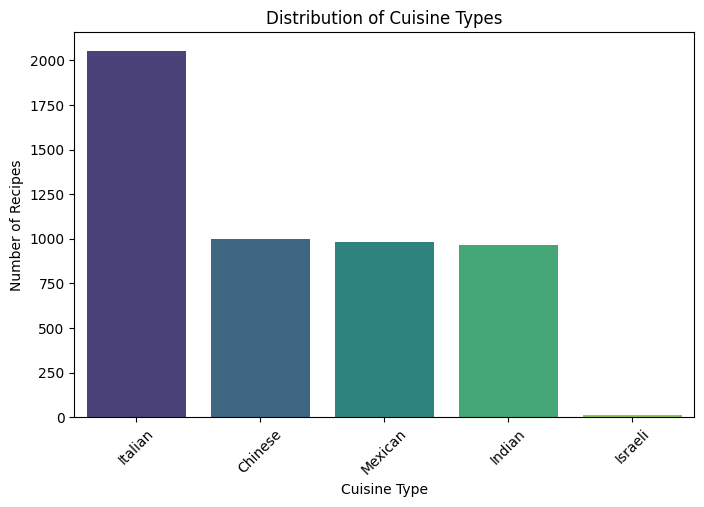

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# סיווג המטבח לפי סוג
cuisine_counts = df['Cuisine_Type'].value_counts()

# הצגה של הגרף עצמו
plt.figure(figsize=(8,5))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette="viridis")
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()




```
** The Most rating recipe.
```



              Recipe_Name  User_Rating
2505     Margherita Pizza            5
3687   Vegetable Stir Fry            5
3682           Beef Tacos            5
1378  Spaghetti Bolognese            5
1377           Beef Tacos            5


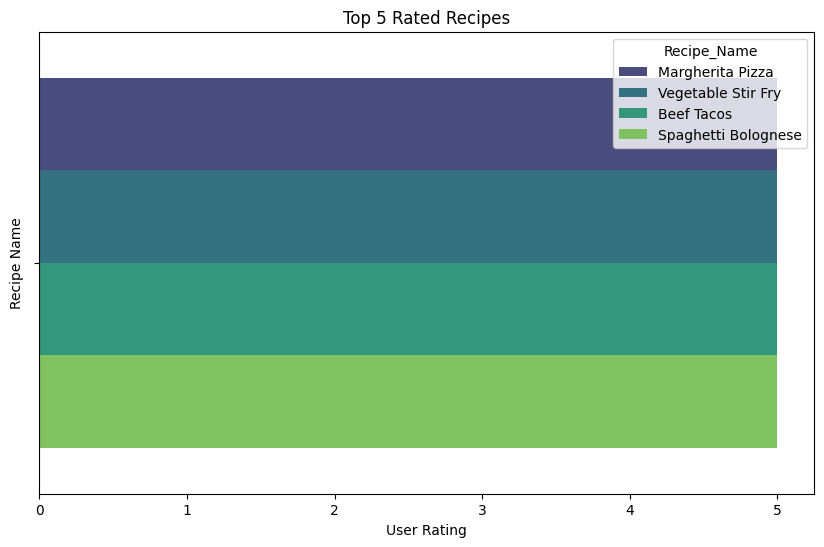

In [ ]:
#הצגה של 5 מתכונים מומלצים
top_rated_recipes = df[['Recipe_Name', 'User_Rating']].sort_values(by='User_Rating', ascending=False).head(5)
print(top_rated_recipes)

# הצגה בגרף
plt.figure(figsize=(10,6))
sns.barplot(x='User_Rating', hue='Recipe_Name', data=top_rated_recipes, palette='viridis')
plt.title('Top 5 Rated Recipes')
plt.xlabel('User Rating')
plt.ylabel('Recipe Name')
plt.show()


```
* Show which Cuisine has most calories.
```

Cuisine_Type
Indian     501.030114
Italian    498.912895
Mexican    495.671066
Chinese    494.261785
Israeli    263.000000
Name: Calories_Per_Serving, dtype: float64


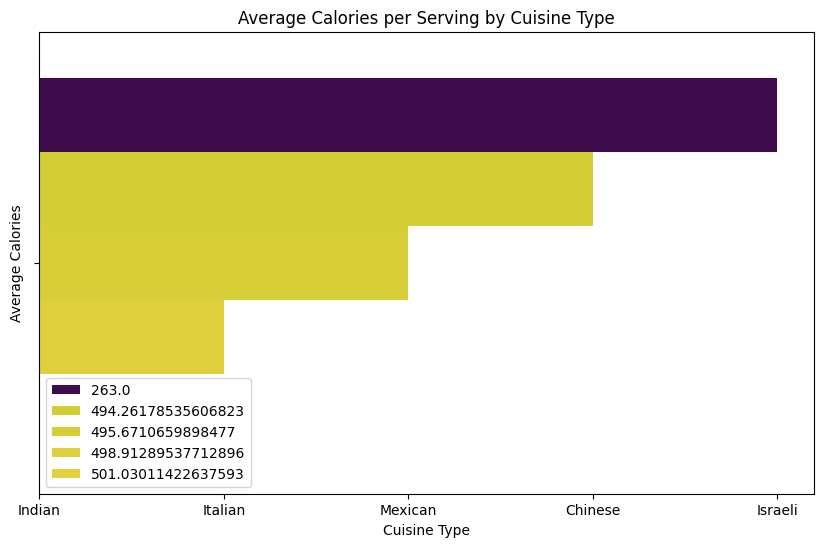

In [ ]:
#הצגה לפי קטגוריות בסוג המטבחים
avg_calories = df.groupby('Cuisine_Type')['Calories_Per_Serving'].mean().sort_values(ascending=False)
print (avg_calories)

# גרף
plt.figure(figsize=(10,6))
sns.barplot(x=avg_calories.index, hue=avg_calories.values, palette='viridis')
plt.title('Average Calories per Serving by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Calories')

plt.show()


<ipython-input-22-85d0c608f701>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=difficulty_counts.index, y=difficulty_counts.values, palette='viridis')


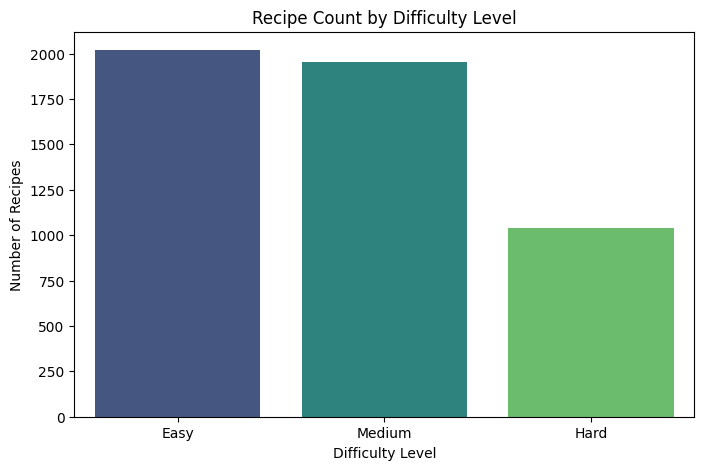

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# הצגת כמות המתכונים לפי רמת קושי
difficulty_counts = df['Difficulty_Level'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=difficulty_counts.index, y=difficulty_counts.values, palette='viridis')
plt.title('Recipe Count by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=0)
plt.show()


## **part 3 - Pre build for the algorithm**

At this stage we will need to choose the algorithm for building the recommendation system - we will choose an appropriate approach and define the algorithms we will use.
There are several work steps that need to be done:
1. In the first stage we will need to perform preprocessing: converting a list of components to vectors, and building the similarity matrix.
2. Building the model itself - we will check which algorithm provides the best recommendations.
3. We will perform a performance evaluation - accuracy (precision, recall, F1-Score)

In [ ]:
print(df['Recipe_Name'].sample(10))  #לצורך בדיקה- הצגה של 10 מתכונים


3436    Spaghetti Bolognese
3824          Chicken Curry
3464     Vegetable Stir Fry
1498     Vegetable Stir Fry
2028    Spaghetti Bolognese
3785       Margherita Pizza
310           Chicken Curry
2428    Spaghetti Bolognese
1260          Chicken Curry
3650             Beef Tacos
Name: Recipe_Name, dtype: object


In [ ]:
# ניקוי והכנת הנתונים
df['Ingredients_List'] = df['Ingredients_List'].str.lower().str.replace('[^a-zA-Z, ]', '', regex=True)
df['Ingredients_List_Tokenized'] = df['Ingredients_List'].apply(lambda x: x.split(','))

# פונקציה למציאת מתכונים לפי רכיב (גרסה מעודכנת עם כל הפרטים)
def recommend_by_ingredient(ingredient, num_recommendations=5):
    ingredient = ingredient.lower()

    # חיפוש מתכונים שמכילים את המרכיב המבוקש
    matching_recipes = df[df['Ingredients_List'].str.contains(ingredient, na=False, case=False)]

    if matching_recipes.empty:
        return f"No recipes found containing the ingredient: {ingredient}"

    # מיון לפי דירוג משתמשים
    matching_recipes = matching_recipes.sort_values(by='User_Rating', ascending=False)

    # הצגת מתכונים עם מידע מלא
    return matching_recipes[['Recipe_Name', 'Cuisine_Type', 'User_Rating', 'Difficulty_Level', 'Cooking_Time_Minutes', 'Ingredients_List', 'Preparation_Steps']].head(num_recommendations)

# בדיקה עם רכיבים לדוגמה
print(recommend_by_ingredient("chicken"))
print(recommend_by_ingredient("tomato"))


        Recipe_Name Cuisine_Type  User_Rating Difficulty_Level  \
1758  Chicken Curry       Indian            5           Medium   
726   Chicken Curry       Indian            5           Medium   
3476  Chicken Curry       Indian            5           Medium   
2406  Chicken Curry       Indian            5           Medium   
2440  Chicken Curry       Indian            5           Medium   

      Cooking_Time_Minutes                                   Ingredients_List  \
1758                    53  chicken, curry powder, coconut milk, onion, ga...   
726                     79  chicken, curry powder, coconut milk, onion, ga...   
3476                    70  chicken, curry powder, coconut milk, onion, ga...   
2406                    42  chicken, curry powder, coconut milk, onion, ga...   
2440                    89  chicken, curry powder, coconut milk, onion, ga...   

                                      Preparation_Steps  
1758  Cook chicken; Add spices; Pour coconut milk; S...  


## **Part 4 - testing Content Based Filtering**

```
We want To use algorithm that help users to find the best match for their Recipe.
```

In [ ]:
# פונקציה למציאת המלצות בהתבסס על נתנוים דומים
def recommend_similar_recipes(recipe_name, rating_tolerance=1.5, time_tolerance=10, num_recommendations=5):
    # חיפוש המתכון המקורי בדטאסט המעודכן
    recipe = df[df['Recipe_Name'].str.lower() == recipe_name.lower()]

    if recipe.empty:
        return f"❌ לא נמצא מתכון בשם {recipe_name}."

    # שליפה של המידע רלוונטי
    cuisine_type = recipe.iloc[0]['Cuisine_Type']
    user_rating = recipe.iloc[0]['User_Rating']
    popularity_score = recipe.iloc[0]['Popularity_Score']
    cooking_time = recipe.iloc[0]['Cooking_Time_Minutes']

    # חיפוש מתכונים דומים מאותו מטבח עם דירוג וזמן הכנה קרובים
    similar_recipes = df[
        (df['Cuisine_Type'] == cuisine_type) &
        (df['User_Rating'].between(user_rating - rating_tolerance, user_rating + rating_tolerance)) &
        (df['Cooking_Time_Minutes'].between(cooking_time - time_tolerance, cooking_time + time_tolerance))
    ]

    # מיון לפי דירוג, פופולריות וזמן הכנה (מהקצר לארוך)
    similar_recipes = similar_recipes.sort_values(
        by=['User_Rating', 'Popularity_Score', 'Cooking_Time_Minutes'],
        ascending=[False, False, True]
    )

    # הצגת מספר מתכונים נבחר
    return similar_recipes[['Recipe_Name', 'Cuisine_Type', 'User_Rating', 'Popularity_Score', 'Cooking_Time_Minutes']].head(num_recommendations)

# הרצה של הפונקציה עם ערך ידוע לנו מהטבלה שהוספנו - למשל שקשוקה.
print(recommend_similar_recipes("Shakshuka"))


     Recipe_Name Cuisine_Type  User_Rating  Popularity_Score  \
5002   Shakshuka      Israeli            5                95   
5006      Malabi      Israeli            5                90   
5000      Hummus      Israeli            5                90   
5003      Sabich      Israeli            4                85   
5007    Bourekas      Israeli            4                85   

      Cooking_Time_Minutes  
5002                    25  
5006                    15  
5000                    20  
5003                    15  
5007                    30  


In [ ]:
!pip install streamlit
!pip install gradio



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


## **Part 5 - User interface (UI)**

In [ ]:
import gradio as gr

#  שליפת רשימת המרכיבים הייחודיים מהדאטהסט
all_ingredients = sorted(set(ingredient.strip() for ingredients in df['Ingredients_List'] for ingredient in ingredients.split(',') if ingredient.strip()))

#  שליפת רשימת האלרגנים הייחודיים
unique_allergens = ["No Filter"] + sorted(set(allergen.strip() for allergens in df["Allergen_Information"].dropna() for allergen in allergens.split(',') if allergen.strip()))

# פונקציה למציאת המלצות על סמך מתכון שנבחר
def recommend_similar_recipes(recipe_name, rating_tolerance=1.5, time_tolerance=10, num_recommendations=5):
    if recipe_name not in df["Recipe_Name"].values:
        return f"❌ No recommendations found for {recipe_name}."

    # שליפת מידע על המתכון שנבחר
    recipe = df[df['Recipe_Name'] == recipe_name].iloc[0]
    cuisine_type = recipe["Cuisine_Type"]
    user_rating = recipe["User_Rating"]
    cooking_time = recipe["Cooking_Time_Minutes"]

    # חיפוש מתכונים דומים מאותו מטבח
    similar_recipes = df[
        (df["Cuisine_Type"] == cuisine_type) &
        (df["User_Rating"].between(user_rating - rating_tolerance, user_rating + rating_tolerance)) &
        (df["Cooking_Time_Minutes"].between(cooking_time - time_tolerance, cooking_time + time_tolerance))
    ].sort_values(by=["User_Rating", "Popularity_Score"], ascending=[False, False]).head(num_recommendations)

    if similar_recipes.empty:
        return f"❌ No recommendations found for {recipe_name}."

    # הצגת המלצות עם עיצוב משופר
    recommendations_html = f"<h3>⭐ Recommended Based on {recipe_name}:</h3><div style='display: flex; flex-wrap: wrap; gap: 15px; justify-content: center;'>"
    for _, row in similar_recipes.iterrows():
        recommendations_html += f"""
        <div style="width: 320px; border-radius: 10px; padding: 12px; background: #282c34; color: white; box-shadow: 2px 2px 10px rgba(255,255,255,0.2); text-align: left;">
            <h3>🍽️ {row['Recipe_Name']}</h3>
            <p><b>🌍 Cuisine:</b> {row['Cuisine_Type']}</p>
            <p><b>⭐ Rating:</b> {row['User_Rating']} / 5</p>
            <p><b>⏳ Cooking Time:</b> {row['Cooking_Time_Minutes']} min</p>
        </div>
        """
    recommendations_html += "</div>"

    return recommendations_html

#  פונקציה לחיפוש מתכונים על פי פילטרים (רכיב, אלרגן, סינון זמן)
def recommend_by_ingredient(ingredient, allergen, sort_by, num_recommendations=5):
    ingredient = ingredient.lower()

    # חיפוש מתכונים עם הרכיב
    matching_recipes = df[df['Ingredients_List'].str.contains(ingredient, na=False, case=False)]

    # סינון לפי אלרגן
    if allergen != "No Filter":
        matching_recipes = matching_recipes[~matching_recipes['Allergen_Information'].str.contains(allergen, na=False, case=False)]

    # אם אין תוצאות
    if matching_recipes.empty:
        return "<div style='color:red;'>❌ No recipes found.</div>", []

    # מיון תוצאות
    sort_options = {
        "User Rating": "User_Rating",
        "Cooking Time": "Cooking_Time_Minutes",
        "Popularity Score": "Popularity_Score"
    }
    matching_recipes = matching_recipes.sort_values(by=sort_options[sort_by], ascending=(sort_by == "Cooking Time"))

    selected_recipes = matching_recipes.head(num_recommendations)
    search_results_html = "<h3>🔍 Search Results:</h3><div style='display: flex; flex-wrap: wrap; gap: 15px; justify-content: center;'>"

    recipe_names = []
    for _, row in selected_recipes.iterrows():
        recipe_names.append(row['Recipe_Name'])
        search_results_html += f"""
        <div onclick="selectRecipe('{row['Recipe_Name']}')" style="cursor: pointer; width: 320px; border-radius: 10px; padding: 10px; background: #222; color: white; box-shadow: 2px 2px 10px rgba(255,255,255,0.1); text-align: left;">
            <h3>🍽️ {row['Recipe_Name']}</h3>
            <p><b>🌍 Cuisine:</b> {row['Cuisine_Type']}</p>
            <p><b>⭐ Rating:</b> {row['User_Rating']} / 5</p>
            <p><b>⏳ Cooking Time:</b> {row['Cooking_Time_Minutes']} min</p>
            <p><b>🛒 Ingredients:</b> {row['Ingredients_List']}</p>
            <p><b>📜 Preparation:</b> {row['Preparation_Steps']}</p>
        </div>
        """
    search_results_html += "</div>"

    return search_results_html, recipe_names

# ממשק gradio מעודכן יותר עם תמיכה בפילטר שלנו
with gr.Blocks() as demo:
    gr.Markdown("# 🍽️ **Smart Recipe Recommendation System**")

    with gr.Row():
        ingredient_input = gr.Dropdown(choices=all_ingredients, label="🔍 Select an ingredient")
        allergen_input = gr.Dropdown(choices=unique_allergens, label="🚫 Filter by allergen")
        sort_input = gr.Dropdown(choices=["User Rating", "Cooking Time", "Popularity Score"], label="📊 Sort by")

    num_recommendations = gr.Slider(1, 10, value=5, label="📌 Number of Recommendations")
    recipe_output = gr.HTML()
    selected_recipe = gr.Dropdown(label="🍽️ Select a Recipe for Recommendations")
    recommendations_output = gr.HTML()

    search_button = gr.Button("🔍 Find Recipes")
    recommend_button = gr.Button("⭐ Show Recommendations")

    # * עדכון תוצאות החיפוש*
    def process_search(ingredient, allergen, sort_by, num_recommendations):
        results, recipes = recommend_by_ingredient(ingredient, allergen, sort_by, num_recommendations)
        return results, gr.update(choices=recipes)

    search_button.click(process_search, inputs=[ingredient_input, allergen_input, sort_input, num_recommendations], outputs=[recipe_output, selected_recipe])

    # * הצגת המלצות רק לאחר בחירת מתכון*
    recommend_button.click(recommend_similar_recipes, inputs=[selected_recipe], outputs=[recommendations_output])

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://36e612079c8234cf08.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


 ❗ סיכום השיקולים האתיים

במערכת ההמלצות שלנו זיהינו שלושה שיקולים אתיים מרכזיים:

1. השפעת חזרתיות מתכונים על ההמלצות - מתכונים שמופיעים מספר פעמים יכולים לקבל עדיפות בצורה שהיא לא בהכרח שיוויונית, וזה עלול לפגוע בחלק ממהמלצות.
2. הטיות בדירוג המשתמש - דירוגים עם מספר נמוך של הצבעות או העדפה של מטבח מסוים יכול לגרום להעדפת סוגי מתכונים מסוימים.
3. בעיית האלרגנים - החלק החשוב ביותר שכדאי לשים לב אליו, מאחר וייתכן כי משתמש הזין מתכון מסוים ואין בקרה בפועל על האלרגנים הקיימים, מה שעלול להוביל לכך שמתמשים עם רגישות מסוימת יקבלו המלצות שלא תואמות למצב הבריאותי שלהם.

------------------------------------------

**חזרתיות מתכונים והשפעתה על הדירוגים**

אחת ההטיות המרכזיות שזיהינו במערכת ההמלצות שלנו נובעת מהמבנה של הדאטהסט. הדאטהסט מכיל מעל 5,000 שורות, אך בפועל יש בו כ-30 מתכונים ייחודיים בלבד, כאשר כל אחד מהם מופיע במספר גרסאות שונות עם וריאציות קלות.
לדוגמה, מתכון לפיצה מרגריטה עשוי להופיע מספר פעמים:

בגרסה הראשונה – עם המרכיבים הבסיסיים (קמח, ביצים, שמן, מוצרלה ורסק עגבניות).

בגרסה השנייה – אותם מרכיבים, אך בתוספת של זיתים.

בגרסה השלישית – אותו מתכון בדיוק, אך עם זמן הכנה שונה.

מצב זה גורם לכך שמתכון מסוים יופיע פעמים רבות במערכת, והדירוג שלו יחושב כממוצע בין כל הגרסאות השונות שלו. כתוצאה מכך, מתכונים שחוזרים על עצמם עשויים לקבל יתרון לא הוגן בדירוגים, בעוד שמתכונים נדירים יותר עשויים לקבל פחות חשיפה.

פיתרון אפשרי 👋

ניסינו לסנן מתכונים כפולים כך שכל מתכון יופיע פעם אחת בלבד, אך פתרון זה צמצם את הדאטהסט באופן קיצוני, מ-5,000 שורות ל-30 שורות בלבד, דבר שפוגע בגיוון המתכונים ובאיכות ההמלצות. במקום זאת, בחרנו להשתמש בחישוב ממוצע של הדירוגים עבור כל גרסה של אותו מתכון.

------------------------------------------


**השפעת דירוגי משתמשים על ההמלצות**

שיקול נוסף נוגע לדירוגי המשתמשים, שהם חלק מהפרמטרים שמשפיעים על סדר ההמלצות. עם זאת, דירוגים אלו יכולים להיות מוטים מכמה סיבות:

מספר הצבעות לא אחיד – מתכון שקיבל רק מספר קטן של דירוגים גבוהים עלול להופיע לפני מתכון אחר שקיבל הרבה יותר דירוגים, אך בממוצע מעט נמוכים יותר.

הטיה תרבותית – משתמשים מאזורים מסוימים נוטים להעדיף מטבחים מסוימים, מה שיכול לגרום למצב שבו יש העדפה של מטבחים פופולריים על חשבון מטבחים נדירים יותר.

פיתרון אפשרי 👋

כדי לצמצם את ההטיה הזו, ניתן לשקלל את מספר הדירוגים לצד הציון הממוצע, כך שמתכון עם יותר דירוגים יקבל משקל גבוה יותר.
תהיה איזושהי בקרה על ההצבעות והדירוג שניתן כדי למנוע מצב של חוסר איזון.

------------------------------------------

**בעיית האלרגנים והתאמה אישית**

הדאטהסט שלנו מכיל עמודת מידע על אלרגנים, אך אין מנגנון שבודק באופן מלא את התאמת המתכונים למשתמשים עם רגישויות מזון. לדוגמה:

מתכון יכול להיות מסומן כ**"צמחוני"**, אך בפועל להכיל ג’לטין או מרכיב אחר שאינו מתאים.
משתמשים עם אלרגיה חריפה לבוטנים או גלוטן עלולים לקבל מתכונים שלא סומנו נכון, למרות שהם מכילים רכיבים מסוכנים עבורם.

פיתרון אפשרי 👋

כדי להתמודד עם בעיה כזו ולהיות מוגן גם מבחינה משפטית, כדאי לציין דבר ראשון שאין להסתמך בהכרח על עמודה זו ויש לבדוק את רשימת המרכיבים .
בנוסף, אפשר לבנות פונקציה שבהינתן רשימת רכיבים תאמת האם העמודה של אלרגניים אכן נכונה, ובעצם להבטיח מעין מצב שמשתמש שהזין מתכון בדטהסט לא שגה בתום לב או מפאת חוסר ידע בסימון הרגישויות של מתכון זה .